In [929]:
%matplotlib inline

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import gc
import matplotlib.pyplot as plt
import seaborn as sb
from fastai.imports import *
# from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import missingno as msno
from sklearn.model_selection import train_test_split
import statistics
from imblearn.over_sampling import SMOTE

In [930]:
df = pd.read_csv('bank-marketing/bank-additional-full.csv', sep=';')
# df['id'] = df.index + 1

In [931]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [932]:
df.shape

(41188, 21)

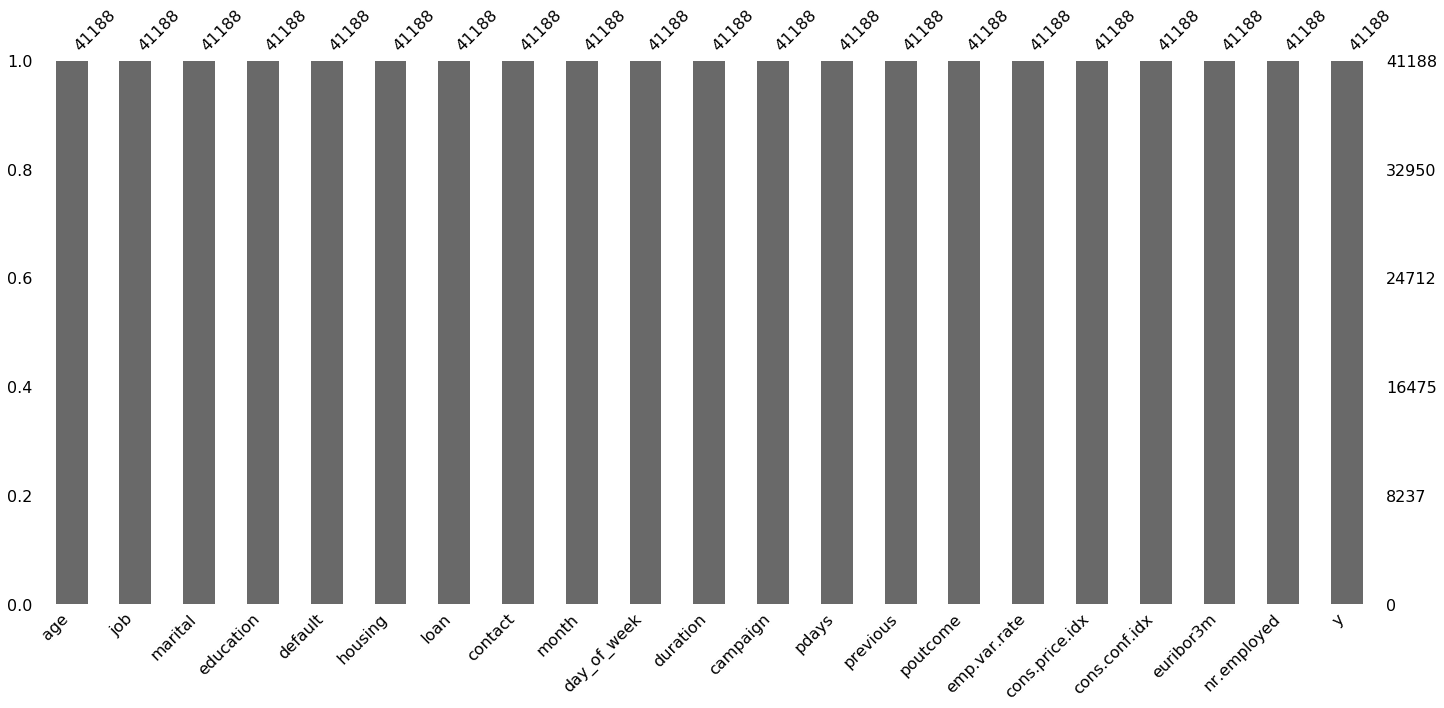

In [933]:
msno.bar(df)

In [934]:
# Split into predictor and response dataframes.

X_df = df.drop('y', axis=1)
y = df['y']

X_df.shape,y.shape

((41188, 20), (41188,))

In [935]:
# Map response variable to integers 0,1.

y = pd.Series(np.where(y.values == 'yes',1,0), y.index)

In [936]:
y.value_counts()

0    36548
1     4640
dtype: int64

In [937]:
# Separating with continuous and categorical variables.

X_cont = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
X_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

cont_df = X_df[X_cont]
cat_df = X_df[X_cat]

In [938]:
# Converting categorical features to numerical values.

cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [939]:
# Initial numeric dataframe

X_df = cont_df.join(pd.get_dummies(cat_df))

In [940]:
X_df.shape

(41188, 61)

In [941]:
X_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [942]:
# Split into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 61), (12357, 61), (28831,), (12357,))

In [943]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
model_base = clf.fit(X_train, y_train)

In [944]:
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

0.8966577648296512

In [945]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[10792,   143],
       [ 1134,   288]])

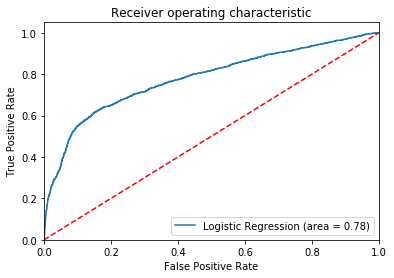

In [946]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, model_base.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_base.predict_proba(X_test)[:,1])
# plt.figure()

probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Feature Importance

In [947]:
# Feature importance rankings.

weights = zip(X_df.columns, model_base.coef_[0])
ranked_weights = sorted(weights, key=lambda x: x[1], reverse = True)

In [948]:
# Top 10 positive feature importance

ranked_weights[:10]

[('cons.price.idx', 0.3518094624673391),
 ('month_jul', 0.1671725030144373),
 ('contact_cellular', 0.16148617971076784),
 ('poutcome_nonexistent', 0.13538169429784108),
 ('month_mar', 0.1264814593862346),
 ('default_no', 0.11456821078234078),
 ('education_university.degree', 0.1068855022927384),
 ('month_aug', 0.09762707436957915),
 ('marital_single', 0.08215949643384302),
 ('job_admin.', 0.07804973658922298)]

In [949]:
# Top 10 negative feature importance

ranked_weights[-10:]

[('education_basic.9y', -0.07440934956196187),
 ('euribor3m', -0.08097976269375051),
 ('default_unknown', -0.11090849133614451),
 ('day_of_week_mon', -0.11378850839627806),
 ('job_blue-collar', -0.1261920549895963),
 ('previous', -0.15377543230832505),
 ('contact_telephone', -0.1580399621283941),
 ('poutcome_failure', -0.15827053926564855),
 ('emp.var.rate', -0.22760118448270103),
 ('month_may', -0.46562999602745847)]

In [950]:
abs_weights = zip(X_df.columns, model_base.coef_[0]) 
abs_ranked_weights = sorted(abs_weights, key=lambda x: abs(x[1]), reverse = True)
abs_ranked_weights[:10]

[('month_may', -0.46562999602745847),
 ('cons.price.idx', 0.3518094624673391),
 ('emp.var.rate', -0.22760118448270103),
 ('month_jul', 0.1671725030144373),
 ('contact_cellular', 0.16148617971076784),
 ('poutcome_failure', -0.15827053926564855),
 ('contact_telephone', -0.1580399621283941),
 ('previous', -0.15377543230832505),
 ('poutcome_nonexistent', 0.13538169429784108),
 ('month_mar', 0.1264814593862346)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

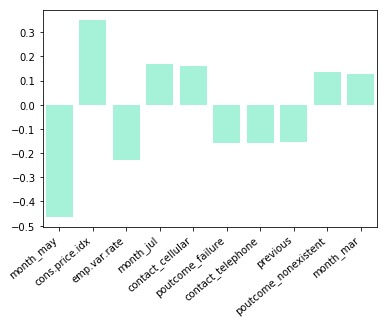

In [951]:
# Absolute value feature importance plot

labels, weights = zip(*abs_ranked_weights[:10])
sb.barplot(x = pd.Series(labels), y = pd.Series(weights), color='aquamarine', alpha=0.8)
plt.xticks(rotation=40, ha='right')

In [952]:
# Pairplot to look at distributions.

# sb.pairplot(cont_df)

## Feature engineering

In [953]:
X_df_2 = X_df.copy()

In [954]:
# Creating binary variable for whether there was previous contact.

X_df_2[(X_df_2['previous'] == 0) & (X_df_2['pdays'] != 999)]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success


In [955]:
X_df_2['previous_contact'] = np.where(X_df_2['pdays'] == 999, 0, 1)

# X_df_2 = X_df_2.drop('pdays', axis = 1)

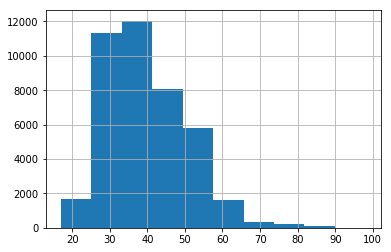

In [956]:
X_df_2['age'].hist()

In [957]:
bins5(X_df_2, 'age')

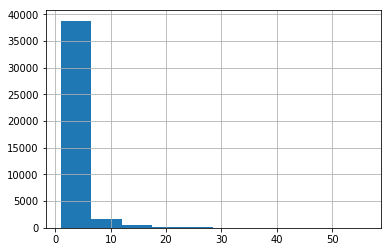

In [958]:
X_df_2['campaign'].hist()

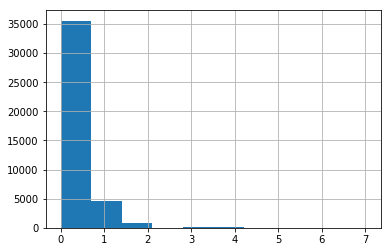

In [959]:
X_df_2['previous'].hist()

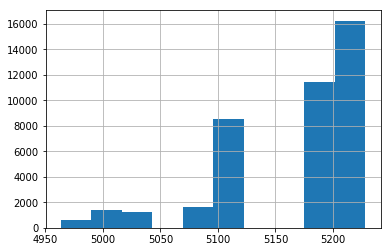

In [960]:
X_df_2['nr.employed'].hist()

In [961]:
def bins5(df, col):
    df[col] = pd.cut(df[col], 5, labels=range(5))

In [962]:
bins5(X_df_2, 'age')
bins5(X_df_2, 'campaign')
bins5(X_df_2, 'previous')
bins5(X_df_2, 'nr.employed')

In [963]:
# SMOTE for rebalancing

y.value_counts()[1]/y.value_counts().sum()

0.11265417111780131

In [964]:
# Threshold setting for coefficient size.

coef_thresh = np.percentile(abs(model_base.coef_[0]), 20)
coef_thresh

0.00650828952760949

In [965]:
# Features with very low coefficients that do not contribute much to the model.

low_coefs = [feature[0] for feature in abs_ranked_weights if abs(feature[1]) < coef_thresh]
low_coefs

['age',
 'loan_no',
 'job_entrepreneur',
 'job_unknown',
 'month_apr',
 'marital_unknown',
 'pdays',
 'loan_yes',
 'education_illiterate',
 'housing_unknown',
 'loan_unknown',
 'default_yes']

In [966]:
# Drop low importance features

# X_df_2 = X_df_2.drop(columns = low_coefs)
# X_df_2.shape

In [967]:
# Highly correlated features

corr_mat = X_df_2.corr()
half_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
half_corr_mat.head()

,pdays,emp.var.rate,cons.price.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,previous_contact
pdays,NaN,0.271004,0.078889,0.296899,-0.025398,0.065335,0.019246,-0.001649,0.000254,-0.072084,0.014307,0.030573,-0.096367,0.004575,-0.023085,-0.011419,0.011711,0.031614,-0.042015,-0.005989,0.005804,0.023238,0.036963,0.005522,-0.002086,-0.003493,-0.036958,-0.022014,-0.080072,0.080047,0.001668,0.010131,0.002033,-0.010719,-0.000737,0.002033,-0.000086,-0.117970,0.117970,-0.009629,-0.003176,-0.076425,0.049695,0.015957,-0.078769,0.070690,-0.016946,-0.128677,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,-0.999992
emp.var.rate,NaN,NaN,0.775334,0.972245,-0.024572,0.057264,0.009363,0.036367,-0.016642,-0.103678,0.001477,0.019431,-0.139725,0.054268,-0.019581,0.015789,0.018558,0.080189,-0.099403,-0.008513,0.028660,0.023065,0.020422,-0.017078,-0.002865,0.022154,-0.045331,-0.003038,-0.203285,0.203218,0.004445,0.059100,0.003152,-0.059862,-0.002392,0.003152,0.001193,-0.393584,0.393584,-0.312990,0.177895,-0.124174,0.314863,0.148653,-0.138849,-0.111356,-0.105917,-0.213706,-0.170366,-0.015277,-0.018139,-0.007673,0.014582,0.026797,-0.381706,0.472501,-0.256886,-0.270945
cons.price.idx,NaN,NaN,NaN,0.688230,-0.041840,0.075322,0.009825,0.028335,-0.025268,-0.052251,-0.005122,0.033282,-0.062117,-0.010849,-0.003262,0.022246,0.018956,0.046424,-0.063013,-0.007958,0.047959,0.031201,0.034202,0.008704,-0.009332,-0.003827,-0.091954,0.030016,-0.168234,0.168322,-0.003141,0.077170,0.016361,-0.081920,-0.000982,0.016361,-0.005944,-0.591474,0.591474,-0.205878,-0.192027,-0.099017,0.253303,0.445513,-0.095783,-0.057274,-0.215273,-0.092174,-0.046905,0.002569,0.001273,-0.017143,0.001216,0.012479,-0.297718,0.304264,-0.077416,-0.078715
euribor3m,NaN,NaN,NaN,NaN,-0.023831,0.046775,0.018744,0.036392,-0.001590,-0.102454,0.007421,0.014666,-0.147551,0.050793,-0.014171,0.016982,0.019309,0.088908,-0.109479,-0.007840,0.025269,0.021225,0.018334,-0.020583,-0.001263,0.019634,-0.034208,-0.006061,-0.195337,0.195251,0.005274,0.058233,0.002873,-0.058913,-0.000697,0.002873,-0.000487,-0.399773,0.399773,-0.340480,0.164534,-0.105860,0.281835,0.141107,-0.164298,-0.133859,0.019524,-0.185937,-0.190321,-0.015371,-0.023279,-0.013757,0.022732,0.030201,-0.385417,0.488406,-0.281022,-0.296920
job_admin.,NaN,NaN,NaN,NaN,NaN,-0.313313,-0.111417,-0.094595,-0.160892,-0.121502,-0.110021,-0.190063,-0.085748,-0.257516,-0.092467,-0.052307,0.020013,-0.120494,0.117787,-0.007918,-0.181255,-0.104499,-0.162641,0.122080,-0.009498,-0.161464,0.327321,-0.052604,0.121336,-0.121248,-0.004967,-0.008529,-0.008570,0.011128,-0.015485,-0.008570,0.020088,0.059227,-0.059227,-0.005021,0.074408,0.003324,-0.000040,-0.017926,0.015060,-0.055052,0.008823,0.006538,0.010407,0.009892,-0.000736,-0.003970,-0.001835,-0.003112,0.002771,-0.015560,0.025069,0.025412


In [968]:
len([col for col in half_corr_mat if any(half_corr_mat[col] > 0.85)])

3

In [969]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 62), (12357, 62), (28831,), (12357,))

In [970]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

0.8959294327102048


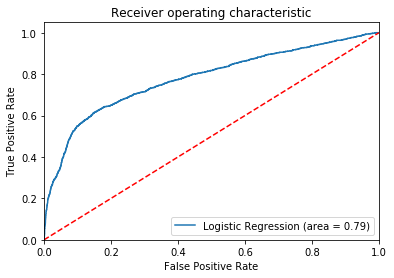

In [971]:
clf = LogisticRegression()
model_norm = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print(model_norm.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_norm.predict_proba(X_test)
preds = probs[:,1]
normfpr, normtpr, normthreshold = metrics.roc_curve(y_test, preds)
norm_roc_auc = metrics.auc(normfpr, normtpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % norm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [972]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [973]:
clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)
print(model_res.score(X_test, y_test))

0.8137897547948532


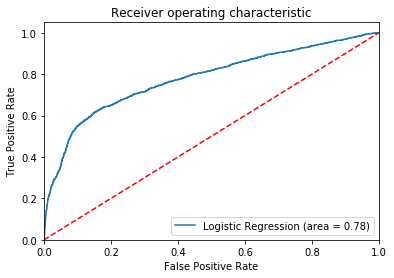

In [974]:
probs = model_res.predict_proba(X_test)
preds = probs[:,1]
resfpr, restpr, resthreshold = metrics.roc_curve(y_test, preds)
res_roc_auc = metrics.auc(resfpr, restpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % res_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Forest Implementation

In [975]:

cross_val_score(logit_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()

NameError: name 'cross_val_score' is not defined